In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,29495,2013,73121,Oklahoma City,OK,1GNSKBE01DR127341,Chevrolet,TahoeLT
1,35969,2016,31800,Conyers,GA,1C4BJWDGXGL119960,Jeep,Wrangler
2,21477,2016,40655,Elk Grove Village,IL,2G1145S39G9149688,Chevrolet,ImpalaLTZ
3,13889,2015,41646,Marysville,WA,1G1PE5SB5F7250712,Chevrolet,Cruze2LT
4,14225,2016,33535,Toledo,OH,1N4AL3AP2GC197633,Nissan,Altima2.5
...,...,...,...,...,...,...,...,...
99995,12988,2007,26126,Jacksonville,AR,1G6KD57Y67U183321,Cadillac,DTS4dr
99996,22700,2017,11011,Pikeville,KY,KNDPMCACXH7165487,Kia,SportageAWD
99997,6988,1998,112086,Garland,TX,WBSBK0337WEC38590,BMW,3
99998,23777,2012,97638,Mesa,AZ,1FTEX1EM1CFC37875,Ford,F-1504WD


In [3]:
df['city+state'] = df['City'] + ' ' + df['State']
df['make+model'] = df['Make'] + ' ' + df['Model']
df_copy = df.copy()
df_copy.drop(['Vin','Make','Model','City','State'],inplace=True,axis=1)
df_test['city+state'] = df_test['City'] + ' ' + df_test['State']
df_test['make+model'] = df_test['Make'] + ' ' + df_test['Model']
df_test_copy = df_test.copy()
df_test_copy.drop(['Vin','Make','Model','City','State'],inplace=True,axis=1)
df_copy

,Price,Year,Mileage,city+state,make+model
0,29495,2013,73121,Oklahoma City OK,Chevrolet TahoeLT
1,35969,2016,31800,Conyers GA,Jeep Wrangler
2,21477,2016,40655,Elk Grove Village IL,Chevrolet ImpalaLTZ
3,13889,2015,41646,Marysville WA,Chevrolet Cruze2LT
4,14225,2016,33535,Toledo OH,Nissan Altima2.5
...,...,...,...,...,...
99995,12988,2007,26126,Jacksonville AR,Cadillac DTS4dr
99996,22700,2017,11011,Pikeville KY,Kia SportageAWD
99997,6988,1998,112086,Garland TX,BMW 3
99998,23777,2012,97638,Mesa AZ,Ford F-1504WD


In [4]:
count_make_model = df_copy['make+model'].value_counts()
popular_car = count_make_model[count_make_model > 400].index
df_copy['make+model'] = df_copy['make+model'].apply(lambda x: x if x in popular_car else 'other')
count_city_state = df_copy['city+state'].value_counts()
popular_car = count_city_state[count_city_state > 400].index
df_copy['city+state'] = df_copy['city+state'].apply(lambda x: x if x in popular_car else 'other')
df_copy = df_copy[(df_copy['make+model'] != 'other') & (df_copy['city+state'] != 'other')]

In [5]:
x_data = df_copy.loc[:,'Year' :]
y_data = df_copy['Price']
x_data_test = df_test_copy.loc[:,'Year' : 'make+model']

In [6]:
x_data = pd.get_dummies(x_data,columns=['city+state','make+model'],dtype=int)
x_data_test = pd.get_dummies(x_data_test,columns=['city+state','make+model'],dtype=int)
x_data , x_data_test = x_data.align(x_data_test,join='left',axis=1,fill_value=0)
x_data

,Year,Mileage,city+state_Austin TX,city+state_Charlotte NC,city+state_Colorado Springs CO,city+state_Dallas TX,city+state_Houston TX,city+state_Indianapolis IN,city+state_Jacksonville FL,city+state_Las Vegas NV,...,make+model_Lexus RX,make+model_MINI Cooper,make+model_Nissan Altima2.5,make+model_Toyota Camry4dr,make+model_Toyota CamrySE,make+model_Toyota CorollaLE,make+model_Toyota RAV44X4,make+model_Toyota Tundra,make+model_Volkswagen Jetta,make+model_Volkswagen Passat4dr
9,2013,77321,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,2016,8176,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
49,2004,213775,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,2014,40144,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,2014,39699,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99932,2014,31653,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
99960,2016,28079,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
99965,2014,93300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99966,2010,179244,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x_train,x_temp,y_train,y_temp = train_test_split(x_data,y_data,test_size=0.20,random_state=42,shuffle=True)
x_val,_,y_val,_ = train_test_split(x_temp,y_temp,test_size=0.50,random_state=42,shuffle=True)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scale = scaler.fit_transform(x_train)
x_val_scale = scaler.transform(x_val)

In [9]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score

best_score = -np.inf
best_degree = None
best_model = None
best_poly = None
mse_train_records = []
mse_val_records = []

for degree in range(1,5):
    print(f'Degree is {degree}...',end='\t')
    poly = PolynomialFeatures(degree)
    x_train_poly = poly.fit_transform(x_train_scale)
    x_val_poly = poly.transform(x_val_scale)

    
    model = Ridge(alpha=0.01)
    model.fit(x_train_poly,y_train)
    y_train_prediction = model.predict(x_train_poly)
    y_val_prediction = model.predict(x_val_poly)

    mse_train = mean_squared_error(y_train,y_train_prediction)
    mse_train_records.append(mse_train)
    mse_val = mean_squared_error(y_val,y_val_prediction)
    mse_val_records.append(mse_val)
    score = r2_score(y_val, y_val_prediction)
    if score > best_score:
        best_score = score
        best_degree = degree
        best_model = model
        best_poly = poly
    print("\U00002705")
    print(f'mse train: {mse_train}\nmse val: {mse_val}')
print(f'Best Score : {best_score}\nBest degree : {best_degree}')
mse_train_records = np.array(mse_train_records)
mse_val_records = np.array(mse_val_records)

Degree is 1...	✅
mse train: 44738246.67045111
mse val: 28751088.618835755
Degree is 2...	✅
mse train: 23376530.35486673
mse val: 22730868.593223136
Degree is 3...	✅
mse train: 9896673.668341907
mse val: 239465032.4275152
Degree is 4...	✅
mse train: 2795110.1488287738
mse val: 46349141404.52821
Best Score : 0.7833969134382188
Best degree : 2


In [10]:
x_test_scale = scaler.transform(x_data_test)
x_test_poly = best_poly.transform(x_test_scale)

y_test_pred = best_model.predict(x_test_poly)
y_test_pred = np.round(y_test_pred).astype(int)

results = pd.DataFrame({'CarId': df_test['CarId'], 'Price': y_test_pred})
results.to_csv('predictions.csv', index=False)

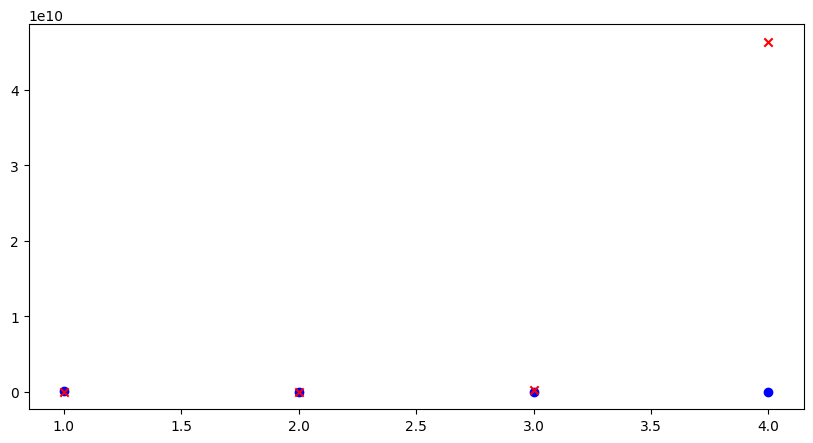

In [11]:
x_range = np.arange(1,len(mse_train_records)+1)
plt.figure(figsize=(10, 5))
plt.scatter(x_range,mse_train_records,c='b',marker='o')
plt.scatter(x_range,mse_val_records,c='r',marker='x')